In [3]:
import os; os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

from tqdm.auto import tqdm

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
# import plotly.express as px
from tensorflow.keras import layers
from pickle import dump, load
from pathlib import Path
import plotly.figure_factory as ff
from scipy.spatial import Delaunay
import plotly.graph_objects as go
import plotly.offline as pyo
import chart_studio.plotly as py
from scipy.interpolate import griddata
import os
import wandb
from einops import rearrange
import json
import glob
from PIL import Image
from sklearn.model_selection import train_test_split
import cv2

In [39]:
img = Image.open("./Images/Wally.png", 'r')
wally = img.resize((80,156))
img_w, img_h = wally.size

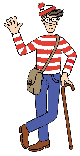

In [1]:
wally

In [46]:
background = Image.new('RGB', (500, 500), (255, 255, 255))
offset = (420,350)
background.paste(wally,offset, wally.convert("RGBA"))

/lhome/ext/uv075/uv0755/miniconda3/envs/cuda/lib/python3.8/site-packages/PIL/Image.py:979: UserWarning:

Palette images with Transparency expressed in bytes should be converted to RGBA images



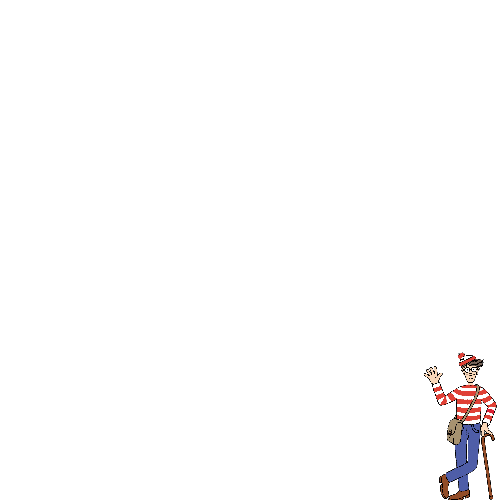

In [2]:
background

In [ ]:
# Y = []
# images = []

# ies = np.linspace(start=0,stop=420,num = 84)
# js = np.linspace(start=0,stop=350,num = 70)

# for i in tqdm(ies):
#     for j in tqdm(js):
#         background = Image.new('RGB', (500, 500), (255, 255, 255))
#         offset = (int(i),int(j))
#         background.paste(wally,offset, wally.convert("RGBA"))
#         background.save(f"./Images/Wally_desp/img_{int(i)+40}_{int(j)+78}.jpg")
#         Y.append([int(i+40),int(j+78)])
#         images.append(f"img_{int(i)+40}_{int(j)+78}.jpg")
    

# data = {'X': images, 'Y': Y}
# df = pd.DataFrame(data=data)
# df.to_csv("Dataset_Wally.csv", index = False)

In [ ]:
# Y = []
# images = []

# ies = np.linspace(start=0,stop=420,num = 84)
# js = np.linspace(start=0,stop=350,num = 70)


# for i in tqdm(ies):
#     for j in tqdm(js):
#         Y.append([i+40,j+78])
#         images.append(f"img_({int(i)}+40)_int({int(j)}+78).jpg")


# data = {'X': images, 'Y': Y}
# df = pd.DataFrame(data=data)
# df.to_csv("Dataset_Wally.csv", index = False)

In [2]:
X = []
Y = []
path = "./Images/Wally_desp/"
data = pd.read_csv("./Datasets/Dataset_Wally.csv")

for image,label in zip(data["X"],data["Y"]):
    img = cv2.imread(path + str(image))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img,(128,128))
    img = img/255
    X.append(img)

    label = np.array(eval(label))/500
    Y.append(label)


[0.08  0.186]


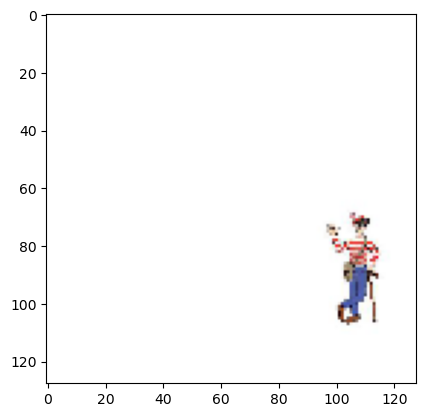

In [9]:
plt.imshow(X[5233])
#plt.axis("off")
print(Y[3])

In [3]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.33, random_state=42)
Xtrain = np.array(Xtrain)
Ytrain = np.array(Ytrain)
Xtest = np.array(Xtest)
Ytest = np.array(Ytest)

In [4]:
Xtrain.shape, Ytrain.shape, Xtest.shape, Ytest.shape

((3939, 128, 128, 3), (3939, 2), (1941, 128, 128, 3), (1941, 2))

In [4]:
Xtrain[0].shape

(500, 500, 3)

In [5]:
modelo_equiv = tf.keras.Sequential([
    layers.Conv2D(32, 5, activation="relu", input_shape=(128,128,3)),
    layers.Conv2D(32, 5, activation="relu"),
    layers.MaxPool2D(2),
    layers.Conv2D(64, 5, activation="relu"),
    layers.MaxPool2D(2),
    layers.Conv2D(128, 5, activation="relu"),
    layers.MaxPool2D(2),
    layers.Conv2D(256, 5, activation="relu"),
    layers.MaxPool2D(2),
    layers.Flatten(),
    layers.Dense(2, activation="sigmoid")
])

2023-03-13 12:26:57.278343: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-03-13 12:26:57.278479: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: mlui01.ific.uv.es
2023-03-13 12:26:57.278515: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: mlui01.ific.uv.es
2023-03-13 12:26:57.278791: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 525.85.12
2023-03-13 12:26:57.278918: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 525.85.12
2023-03-13 12:26:57.278943: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 525.85.12
2023-03-13 12:26:57.285355: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following

In [11]:
modelo_equiv.compile(optimizer="adam", loss ="mse" , metrics=['mae']) #run_eagerly=True: No haga el grafo de operaciones -> Errores más entendibles
history = modelo_equiv.fit(Xtrain, Ytrain, batch_size=32, epochs=10, validation_data = (Xtest, Ytest))

Epoch 1/10
124/124 [==============================] - 119s 959ms/step - loss: 0.0013 - mae: 0.0198 - val_loss: 8.7453e-05 - val_mae: 0.0071
Epoch 2/10
124/124 [==============================] - 119s 962ms/step - loss: 6.4700e-05 - mae: 0.0060 - val_loss: 7.2385e-05 - val_mae: 0.0066
Epoch 3/10
124/124 [==============================] - 119s 960ms/step - loss: 5.8192e-05 - mae: 0.0059 - val_loss: 6.4545e-05 - val_mae: 0.0066
Epoch 4/10
124/124 [==============================] - 120s 964ms/step - loss: 4.6304e-05 - mae: 0.0053 - val_loss: 2.3091e-04 - val_mae: 0.0128
Epoch 5/10
124/124 [==============================] - 121s 974ms/step - loss: 1.2169e-04 - mae: 0.0085 - val_loss: 1.4853e-04 - val_mae: 0.0097
Epoch 6/10
124/124 [==============================] - 121s 974ms/step - loss: 4.9674e-05 - mae: 0.0054 - val_loss: 2.2621e-05 - val_mae: 0.0036
Epoch 7/10
124/124 [==============================] - 121s 973ms/step - loss: 4.8347e-05 - mae: 0.0054 - val_loss: 1.0519e-04 - val_mae: 0.0

In [14]:
prediccion = modelo_equiv.predict(Xtest[0:1])

1/1 [==============================] - 0s 38ms/step


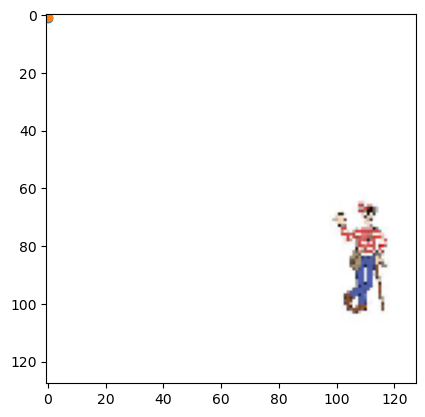

In [15]:
plt.imshow(Xtest[0])
plt.plot(prediccion, 'o')

In [7]:
model = tf.keras.Sequential([
    layers.Conv2D(32, 5, activation="relu", input_shape=(128,128,3)),
    layers.MaxPool2D(2),
    layers.Conv2D(64, 5, activation="relu"),
    layers.MaxPool2D(2),
    layers.Flatten(),
    layers.Dense(2, activation="sigmoid")
])

2023-03-13 18:02:03.023686: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-03-13 18:02:03.023777: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: mlui01.ific.uv.es
2023-03-13 18:02:03.023801: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: mlui01.ific.uv.es
2023-03-13 18:02:03.024073: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 525.85.12
2023-03-13 18:02:03.024155: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 525.85.12
2023-03-13 18:02:03.024174: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 525.85.12
2023-03-13 18:02:03.024832: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following

In [8]:
# Recrea exactamente el mismo modelo solo desde el archivo
model.load_weights('wally_small.h5')

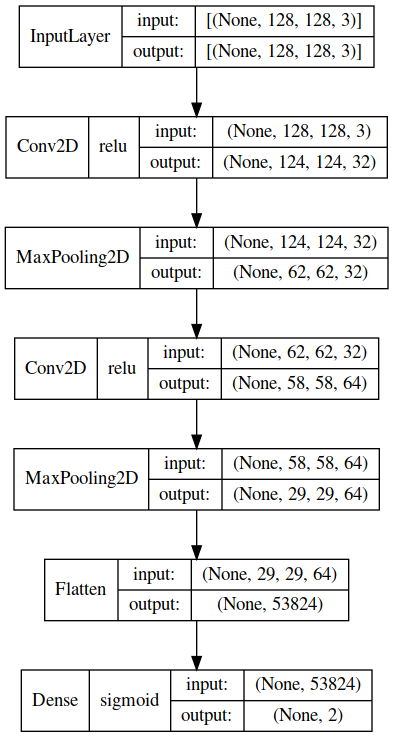

In [9]:
tf.keras.utils.plot_model(
    model,
    #to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=False,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=True,
)

In [10]:
prediccion = model.predict(Xtest[0:1])

NameError: name 'Xtest' is not defined

In [ ]:
plt.imshow(Xtest[0])
plt.plot(prediccion, 'o')